In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib notebook

## 基础 

### figure类

In [ ]:
#几种方法
#1
fig, (ax1, ax2) = plt.subplots(2, 1)

fig, axs = plt.subplots(nrows=2, ncols=2)
axs = axs.flatten()
axs[0]
axs[1]
...
#2先创建画布
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# 3 

<IPython.core.display.Javascript object>


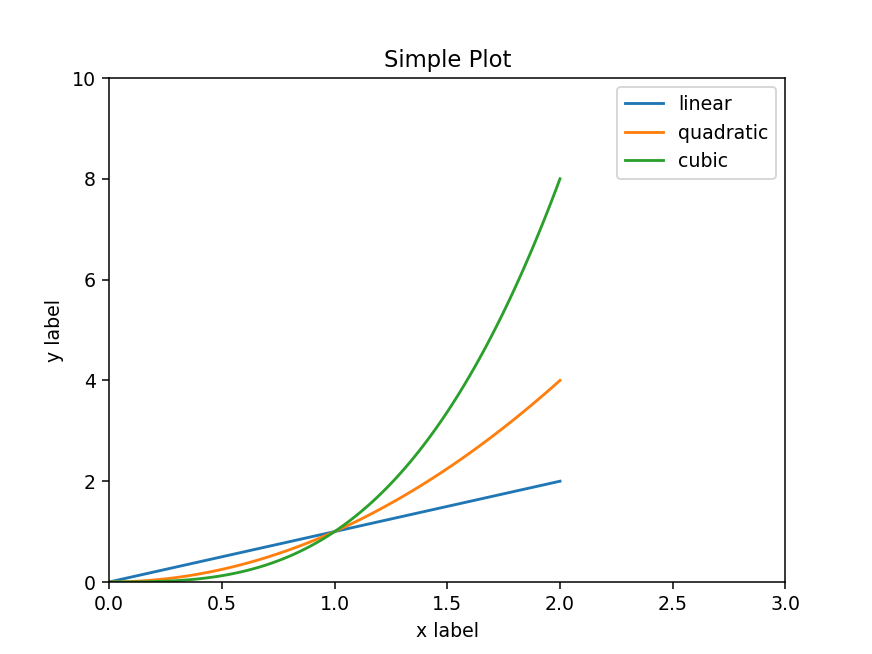

In [75]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # x轴名字
ax.set_ylabel('y label')  # y轴
ax.set_xlim(0,3)#控制坐标范围
ax.set_ylim(0,10)#y'
ax.set_title("Simple Plot")  # 标题
ax.legend(loc='best')  # 图例

### format 点、颜色、线条

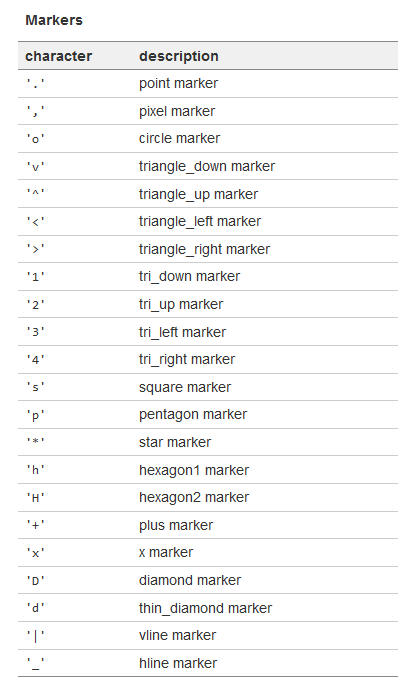

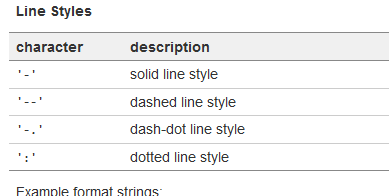

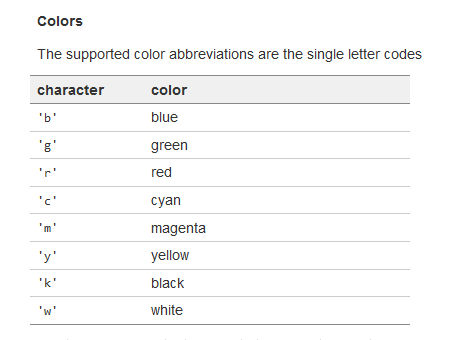

### 线条粗细控制

In [ ]:
linewidth=2.0


### 坐标轴绘制

In [ ]:
ax.spines['left'].set_color('yellow')        #左边线设置为黄色
ax.xaxis.set_tick_params(color='red',colors='green')       #设置X轴刻度颜色
#参考sin作图中的坐标轴设置


### 颜色对照

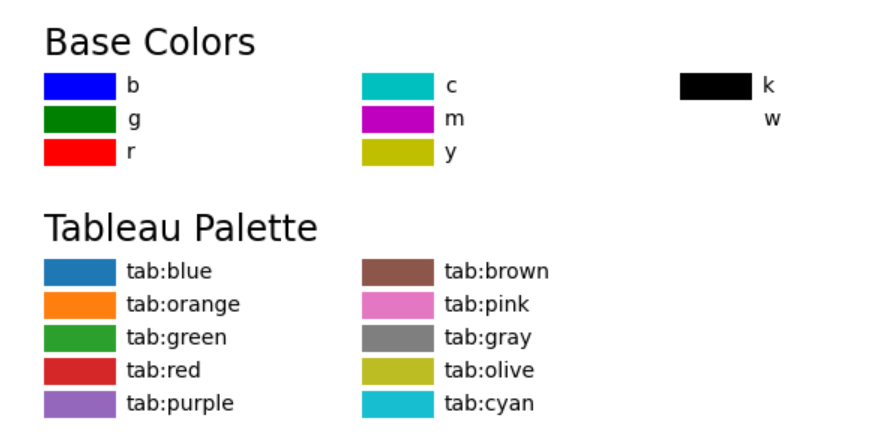

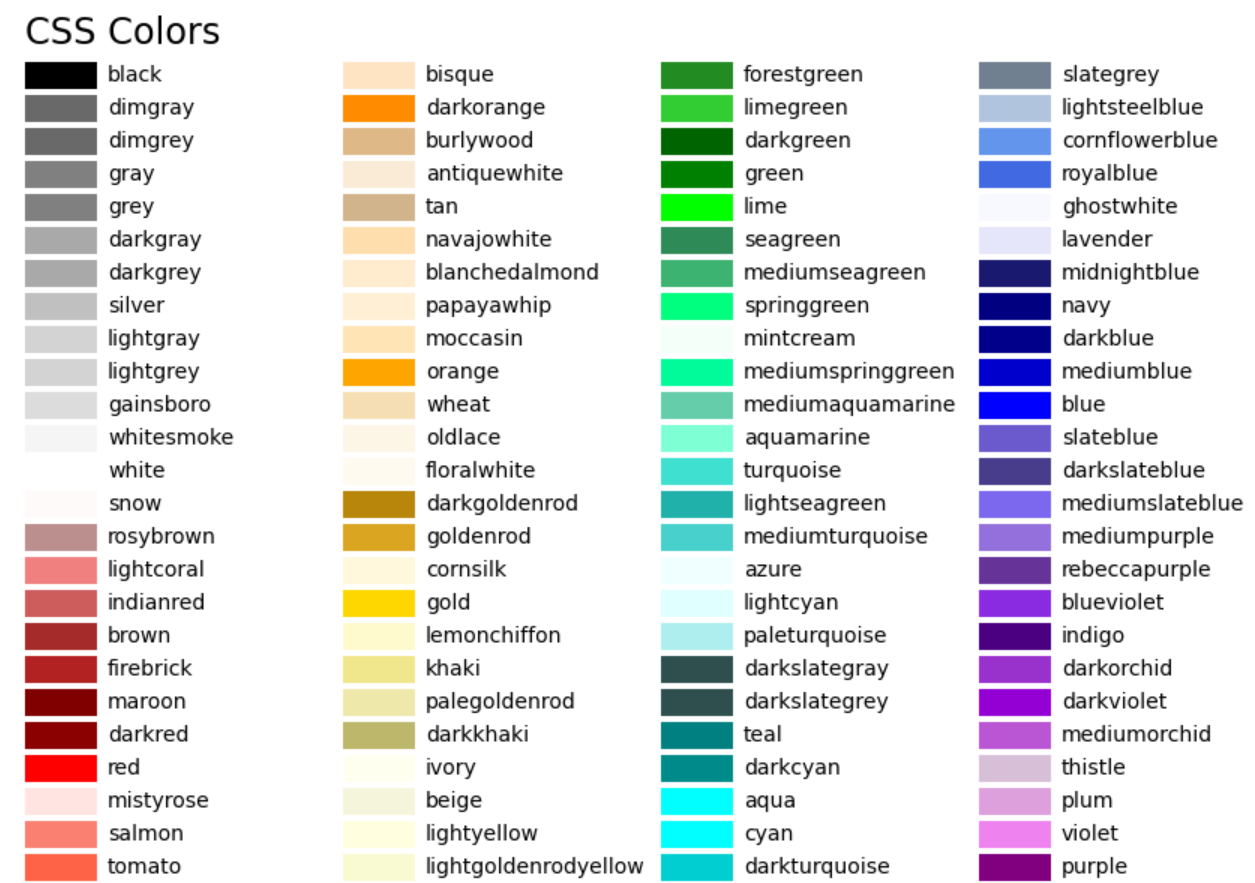

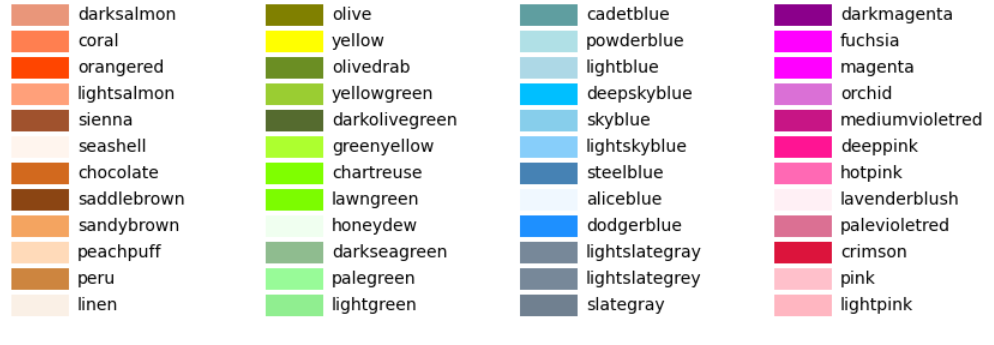

## 图

### 线图 plot

plot([x], y, [fmt], *, data=None, **kwargs)

#### sin  cos

<IPython.core.display.Javascript object>


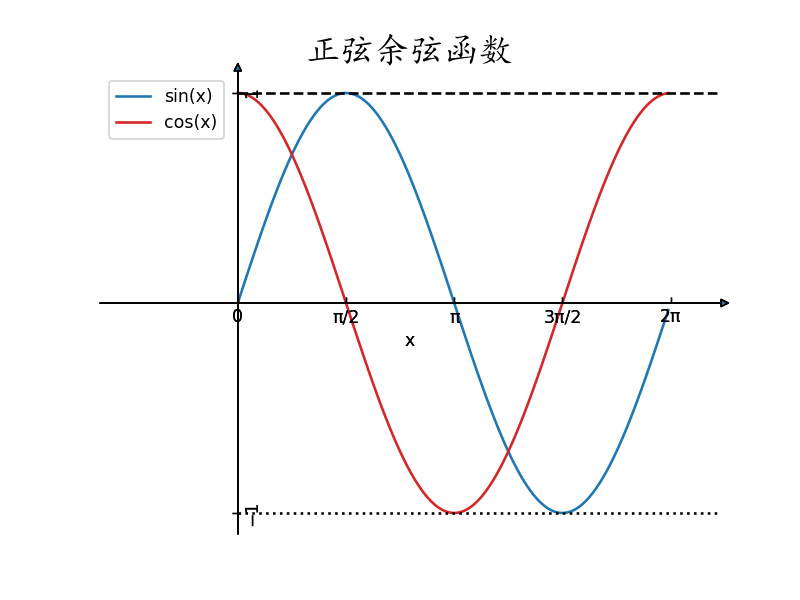

In [10]:
#生成数据
x = np.arange(0, 2 * np.pi, 0.05)
y = np.sin(x)
z = np.cos(x)
#为了画坐标轴，需要用到axisartist
from mpl_toolkits.axisartist.axislines import SubplotZero
fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)#把ax加入画布
#["left", "right", "bottom", "top"],上下左右四条边，可以隐藏
ax.axis["left", "right", "bottom", "top"].set_visible(False)
for direction in ["xzero", "yzero"]:
    #分别代表xy轴，默认是隐藏de
    ax.axis[direction].set_axisline_style("-|>")#加箭头
    ax.axis[direction].set_visible(True)
ax.axis["xzero"].label.set_text("x")
#可以自定义一条坐标轴
#ax.axis["y=1"] = ax.new_floating_axis(nth_coord=0, value=1, axis_direction="bottom")
#ax.axis["y=1"].toggle(all=True)
#ax.axis["y=1"].label.set_text("y = 1")

#画图
ax.plot(x, y, linestyle='-', color='tab:blue', linewidth=1.5, label='sin(x)')
ax.plot(x, z, linestyle='-', color='tab:red', linewidth=1.5, label='cos(x)')

#添加y=+-1的虚线
ax.plot([0, 7], [1,1], 'k--')
ax.plot([0, 7], [-1,-1], 'k:')


#坐标轴控制，标题，图例
ax.set_xticks([0, np.pi/2, np.pi, 1.5*np.pi, 2*np.pi])
ax.set_xticklabels(['0','π/2','π','3π/2','2π'])
ax.set_yticks([-1,1])
ax.set_xlim(-2, 7)
ax.set_title('正弦余弦函数', fontproperties='Kaiti', fontsize=20)
ax.legend(loc='best')

### subplot

<IPython.core.display.Javascript object>


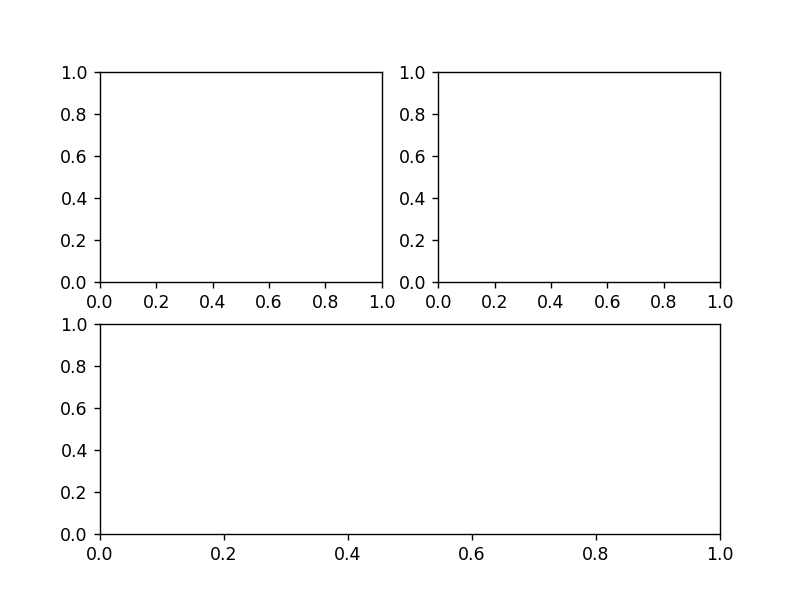

In [4]:
#分块控制
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,1,2)

### hist 

#### 画一个标准正态分布

<IPython.core.display.Javascript object>


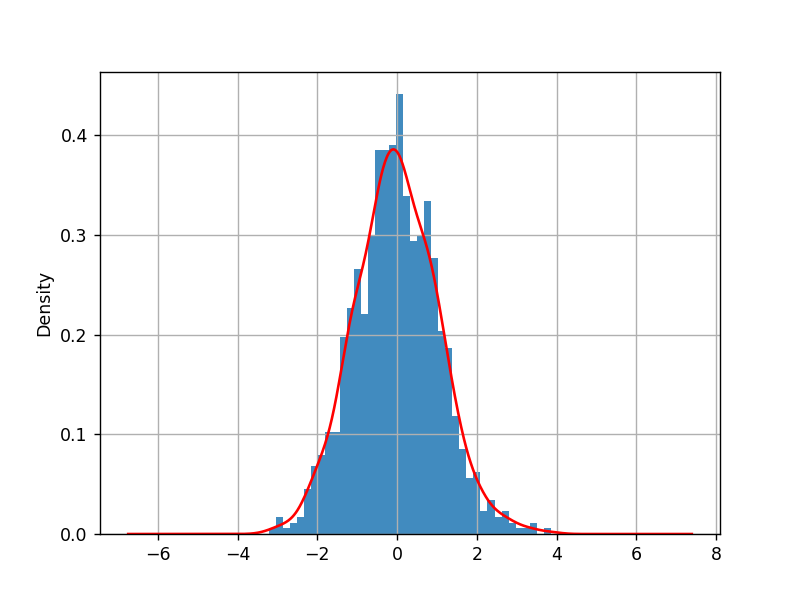

In [25]:
# 数据
np.random.seed(100)
data = np.random.normal(0,1,1000)

#hist
fig, ax = plt.subplots()

#想办法画一条曲线
#df = pd.DataFrame(data.reshape(1000,1), columns=['sample'])# 会有legend sample
df = pd.Series(data)
df.plot.density(ax=ax, color='r')

ax.hist(data, bins=40, density=True, color='tab:blue', alpha=0.85, histtype='bar')
#alpha 透明度
# histtype   
#step : 不填充只有轮廓线
ax.grid()



#### dataframe 快捷画图 seaborn

In [ ]:
np.random.seed(100)
data = np.random.normal(0,1,1000)
df = pd.DataFrame(data.reshape(1000,1), columns=['sample'])
#hist
df.plot.hist(bins=40)

In [ ]:
#density
df.plot.density()

In [ ]:
#seaborn 中的 distplot 二合一
sns.distplot(df['sample'], bins=40, color='k')


## bar 柱状图

### plt方法

<IPython.core.display.Javascript object>


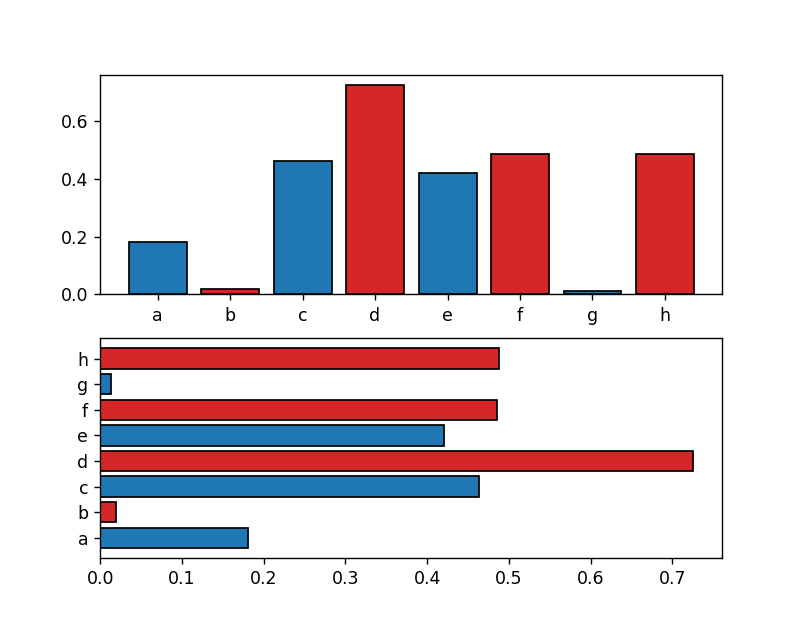

<BarContainer object of 8 artists>

In [45]:
np.random.seed(11)
data = pd.Series(np.random.rand(8), index=list('abcdefgh'))
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.bar(data.index, data.values, width=0.8, color=['tab:blue', 'tab:red'], edgecolor='k') # 第一个是轴上的标记，第二个是数值, 颜色可以交替
#ax1.grid()

#horizontal
ax2.barh(data.index, data.values, color=['tab:blue', 'tab:red'], edgecolor='k')


### bottom 参数来画stack

<IPython.core.display.Javascript object>


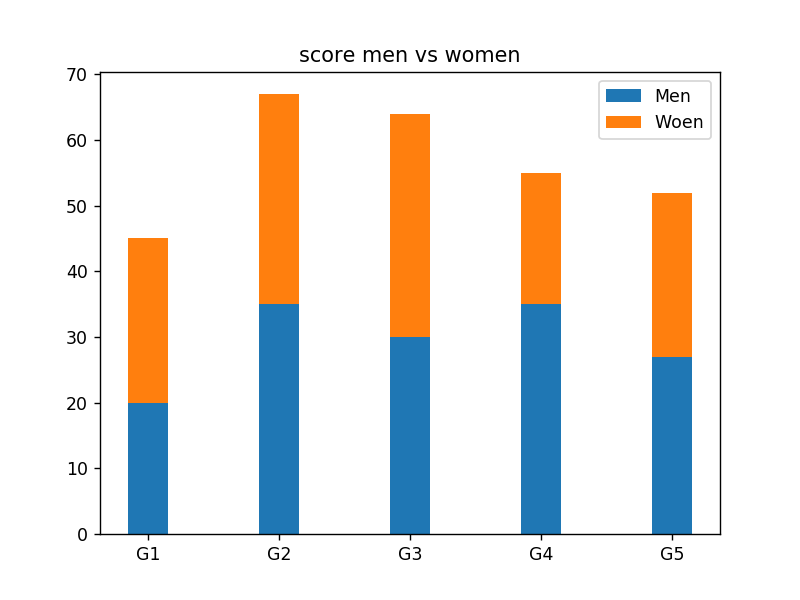

In [47]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

fig, ax = plt.subplots()

wid = 0.3
ax.bar(labels, men_means, width=wid, label='Men')
ax.bar(labels, women_means, bottom=men_means, width=wid, label='Woen')# 第二个图在第一个上面画  bottom

ax.set_title('score men vs women')
ax.legend()

### 同组分开的bar

<IPython.core.display.Javascript object>


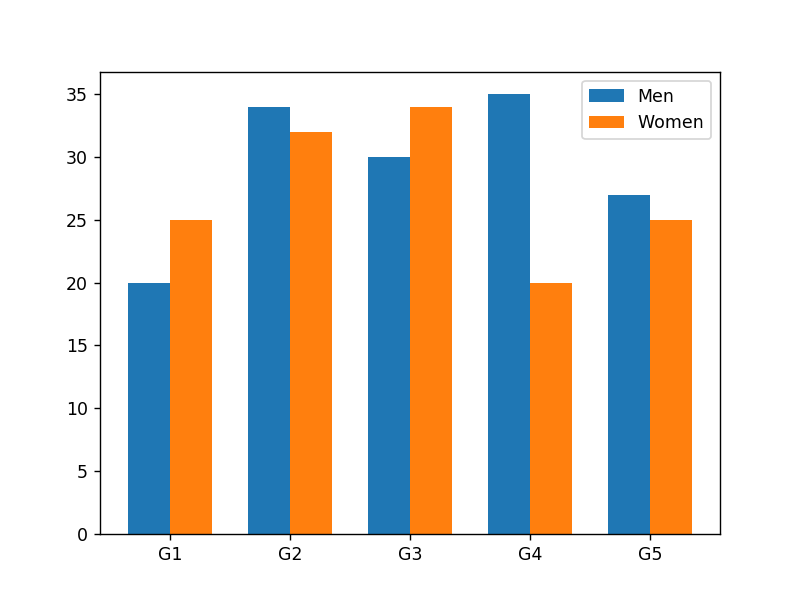

In [51]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
#xlabel是可以用数字的，即x轴，方便控制
fig, ax = plt.subplots()
ax.bar(x - width/2, men_means, width, label='Men')
ax.bar(x + width/2, women_means, width, label='Women')

#该x轴显示
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

### pandas中快捷方法

In [ ]:
np.random.seed(11)
data = pd.Series(np.random.rand(8), index=list('abcdefgh'))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

data.plot.bar(ax=ax1)#可以指定子图
data.plot.barh(ax=ax2)

<IPython.core.display.Javascript object>


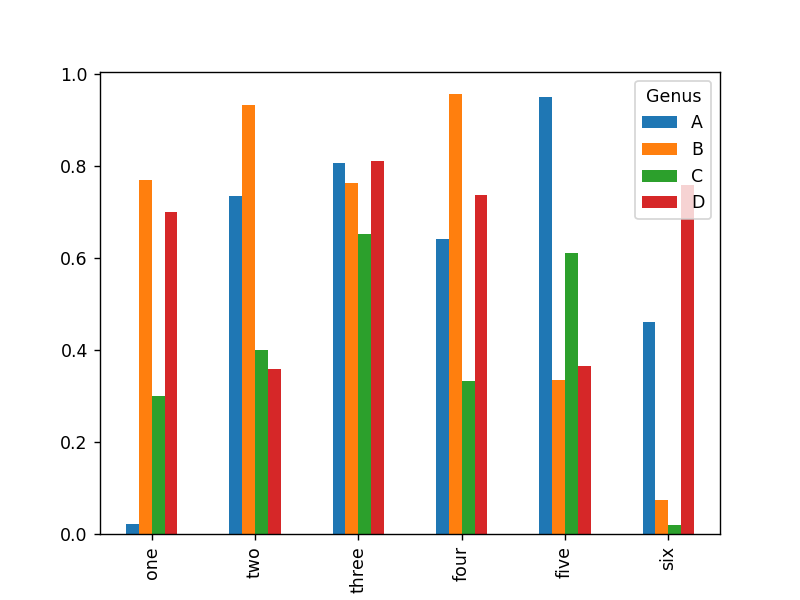

In [57]:
df = pd.DataFrame(np.random.rand(6, 4),
....: index=['one', 'two', 'three', 'four', 'five', 'six'],
....: columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()
#DataFrame 对象， 行名会在x轴上， 不同的列的值在一个区域

<IPython.core.display.Javascript object>


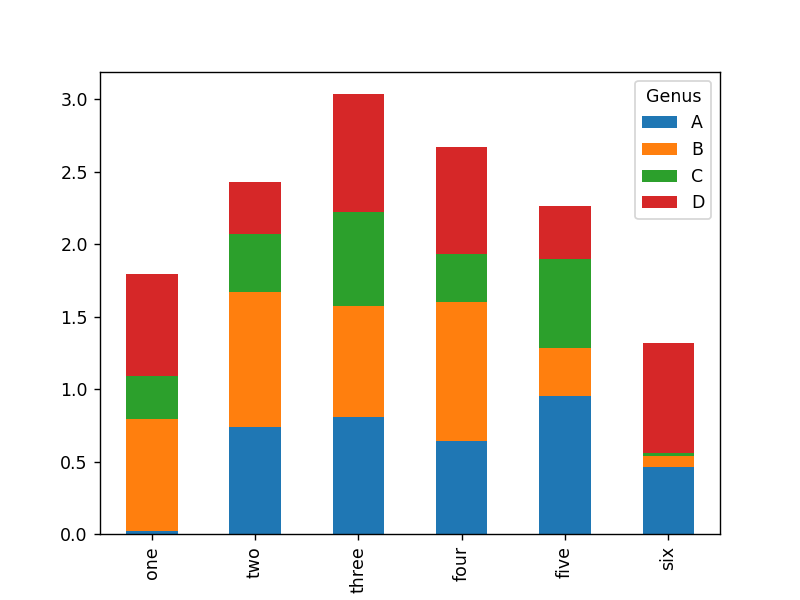

In [62]:
df.plot.bar(stacked=True)
#stacked 参数

## scatter 散点图

In [25]:
np.random.seed(10)
data = np.random.randn(2,20)
x_F10 = data[0, :10]
y_F10 = data[1, :10]

x_L10 = data[0, 10:]
y_L10 = data[1, 10:]
s_big = [70] * 10
s_small = [35] * 10

<IPython.core.display.Javascript object>


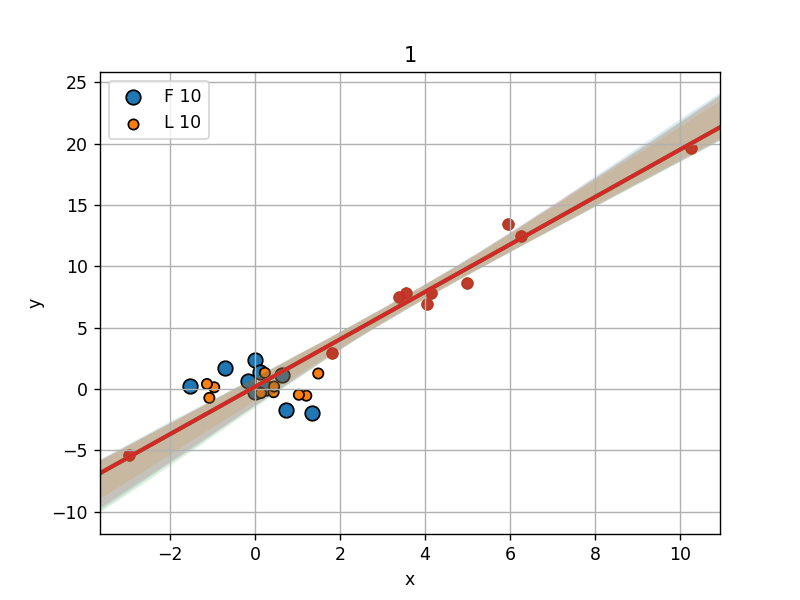

In [28]:
#每一组点的样式相同
fig, ax = plt.subplots()
ax.scatter(x_F10, y_F10, c='tab:blue', edgecolors='black', marker='o', s=70, label='F 10')
ax.scatter(x_L10, y_L10, c='tab:orange', edgecolors='black', marker='o', s=35, label='L 10')
ax.legend()
ax.grid()

### 颜色和大小以数组传入

In [37]:
#画五个点
np.random.seed(10)
data = np.random.randn(2,5)
x = data[0]
y = data[1]
c = [1,2,3,4,5]
s = [100,500,200,40,190]
#五中颜色，五种大小

<IPython.core.display.Javascript object>


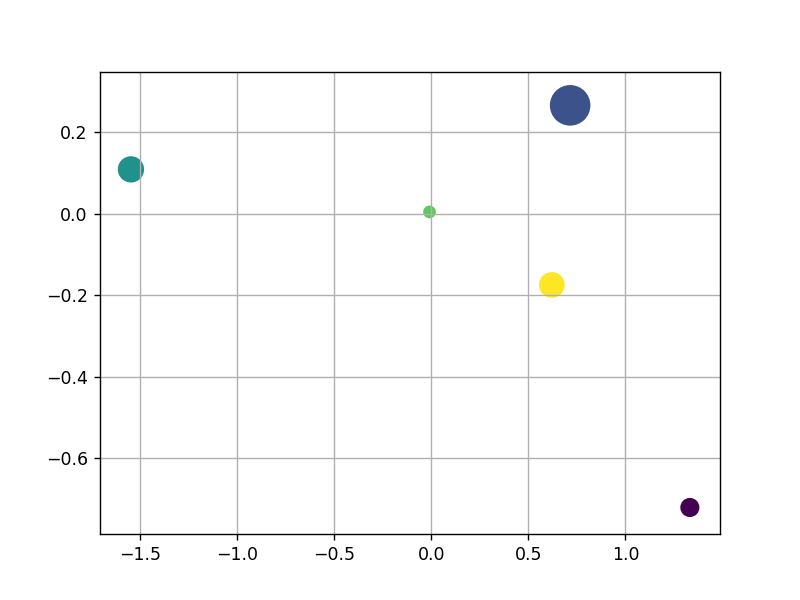

In [49]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=c, marker='o', s=s)
ax.grid()

### Dataframe 快捷

In [58]:
np.random.seed(11)
x_point = np.random.normal(5, 3, 10)
error = np.random.randn(10)
y_point = x_point * 2 + error

<IPython.core.display.Javascript object>


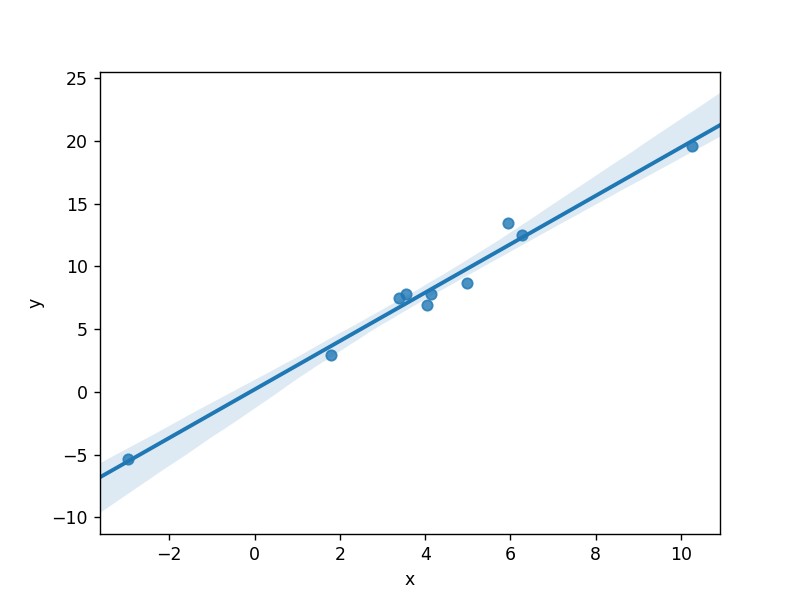

In [64]:
fig, ax = plt.subplots()
data = pd.DataFrame({'x': x_point, 'y': y_point})
sns.regplot('x', 'y', data=data, ax=ax)
#sns 自带 回归散点图

<IPython.core.display.Javascript object>


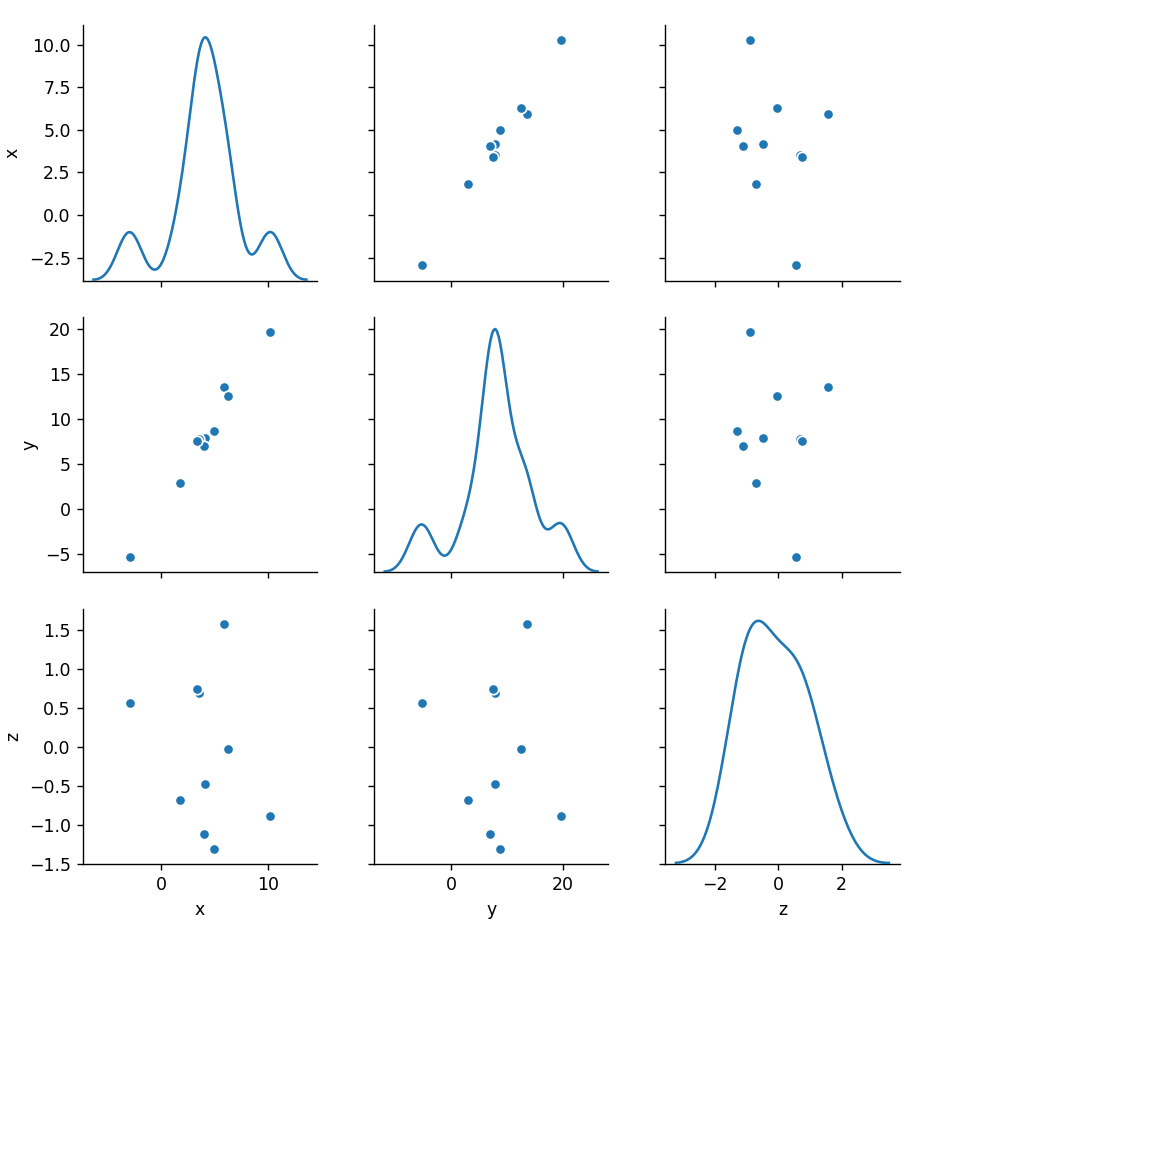

In [67]:
data['z'] = error
sns.pairplot(data, diag_kind='kde')
#配对的散点图

## pie  

<IPython.core.display.Javascript object>


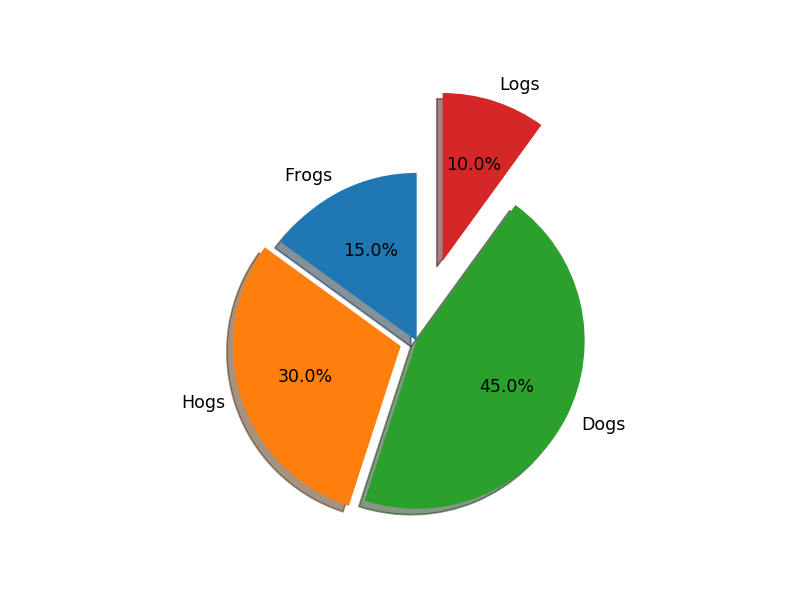

(-1.2142507666786346,
 1.134711077927507,
 -1.149623244974171,
 1.6005354845479554)

In [31]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
#explode 控制每一块距离中心距离
#autopct 在pie上显示百分比， .2f保留两位
#pctdistance 控制pct离中心的距离
ax1.pie(sizes, explode=explode, labels=labels, radius=1,
        autopct= lambda pct: '{:.1f}%'.format(pct), shadow=True, startangle=90,pctdistance=0.6)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

<IPython.core.display.Javascript object>


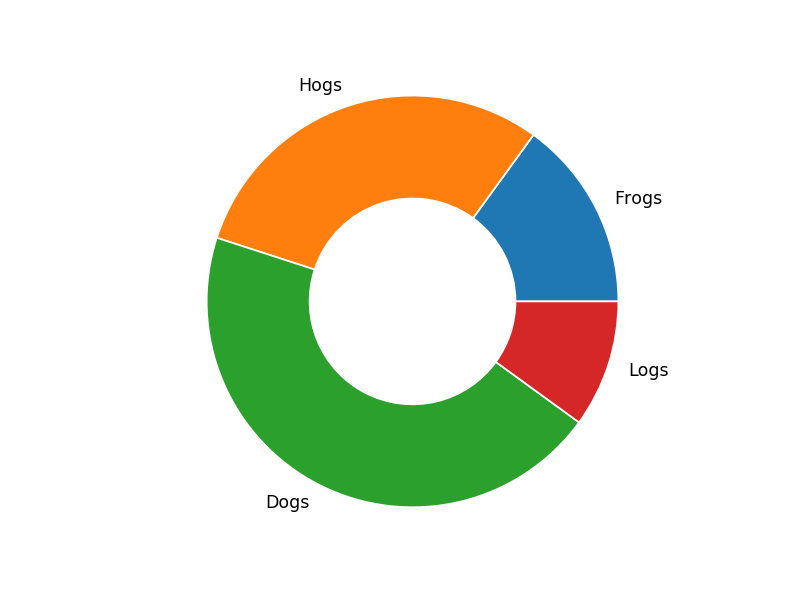

(-1.1258468317413042, 1.101230806657754, -1.12995579546176, 1.1143898348979537)

In [36]:
#wedgeprops
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, radius=1, wedgeprops=dict(width=0.5, edgecolor='w'))
#width pie的半径长度， radius 
#edgecolor 边色
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.